# Optimization For Data Science - Project

Testing ADMM methods on Abalone dataset

https://archive.ics.uci.edu/ml/datasets/abalone

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from scipy.sparse import random as sprandn
from importlib import reload
from numpy.linalg import norm, cholesky
from scipy.sparse.linalg import spsolve
import scipy.sparse as sparse
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

import admm_lasso as al 
import oadmm_lasso as oal 
import fobosADMM_lasso as fal 
import stochasticADMM_lasso as sal 

reload(al)


%matplotlib inline
plt.style.use('seaborn-white')

# Import and Preprocess Data


In [4]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", names=column_names)
print("Number of samples: %d" % len(abalone))
display(abalone.shape)
data = abalone
display(abalone.head())
display(abalone.isnull().sum())

Number of samples: 4177


(4177, 9)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

In [5]:
abalone = data
for label in "MFI":
    abalone[label] = abalone["sex"] == label

abalone = abalone.drop(['sex'], axis = 1)
display(abalone.shape)
display(abalone.head())

(4177, 11)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,False,True


In [6]:
A = abalone.drop(['rings'], axis = 1).values
b = abalone['rings'].values  
b = np.atleast_2d(b).T

# A_n = preprocessing.normalize(A)
convert = StandardScaler()
A_n = convert.fit_transform(A)

# Implement ADMM methods

<h2> Normal ADMM

In [7]:
###############################
# initialize global parameters:
###############################
# lamda_max = norm(A_n.T.dot(b),np.inf)
# lamda = .1*lamda_max
lamda = 0.005

rho = 1.0
rel_par = 1.0
max_iters = 100
abstol = 1e-3
reltol = 1e-2

In [85]:
x, h = al.admm_lasso(A_n, b, lamda, rho, rel_par, max_iters, abstol, reltol)

Text(0.5, 0, 'iter (k)')

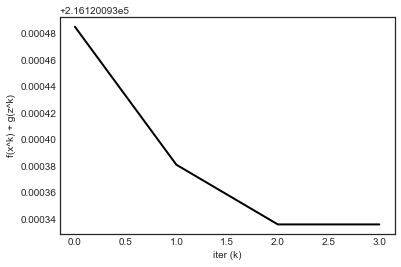

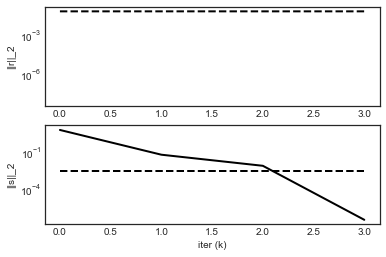

In [86]:
K = len(h['obj_val'][np.where(h['obj_val']!=0)])

fig1 = plt.figure(1)
ax = fig1.add_subplot(111)
ax.plot(np.arange(K), h['obj_val'][:K],'k', ms=10, lw=2)
ax.set_ylabel('f(x^k) + g(z^k)')
ax.set_xlabel('iter (k)')

fig2 = plt.figure(2)
ax1 = fig2.add_subplot(211)
ax1.semilogy(np.arange(K), np.maximum(1e-8, h['r_norm'][:K]),' k',lw=2)
ax1.semilogy(np.arange(K), h['eps_pri'][:K], 'k--', lw=2)
ax1.set_ylabel('||r||_2')

ax2 = fig2.add_subplot(212)
ax2.semilogy(np.arange(K), np.maximum(1e-8,h['s_norm'][:K]), 'k', lw=2)
ax2.semilogy(np.arange(K), h['eps_dual'][:K], 'k--',lw=2)
ax2.set_ylabel('||s||_2')
ax2.set_xlabel('iter (k)')
